In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('no-outlier.csv')
data

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Class
0,0,2.660984,-9.653030,0.470237,1
1,1,2.223091,-9.432167,2.223091,1
2,2,2.098372,-9.481953,0.926070,1
3,3,2.716461,-9.739352,0.912008,1
4,4,2.288388,-9.371498,0.910390,1
...,...,...,...,...,...
155402,155402,8.701128,4.238336,-0.194529,21
155403,155403,8.680778,4.261679,-0.159214,21
155404,155404,8.756194,4.168306,-0.144251,21
155405,155405,8.662222,4.219781,-0.183755,21


In [3]:
label = LabelEncoder()
data['label'] = label.fit_transform(data['Class'])
data

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Class,label
0,0,2.660984,-9.653030,0.470237,1,0
1,1,2.223091,-9.432167,2.223091,1,0
2,2,2.098372,-9.481953,0.926070,1,0
3,3,2.716461,-9.739352,0.912008,1,0
4,4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...,...
155402,155402,8.701128,4.238336,-0.194529,21,20
155403,155403,8.680778,4.261679,-0.159214,21,20
155404,155404,8.756194,4.168306,-0.144251,21,20
155405,155405,8.662222,4.219781,-0.183755,21,20


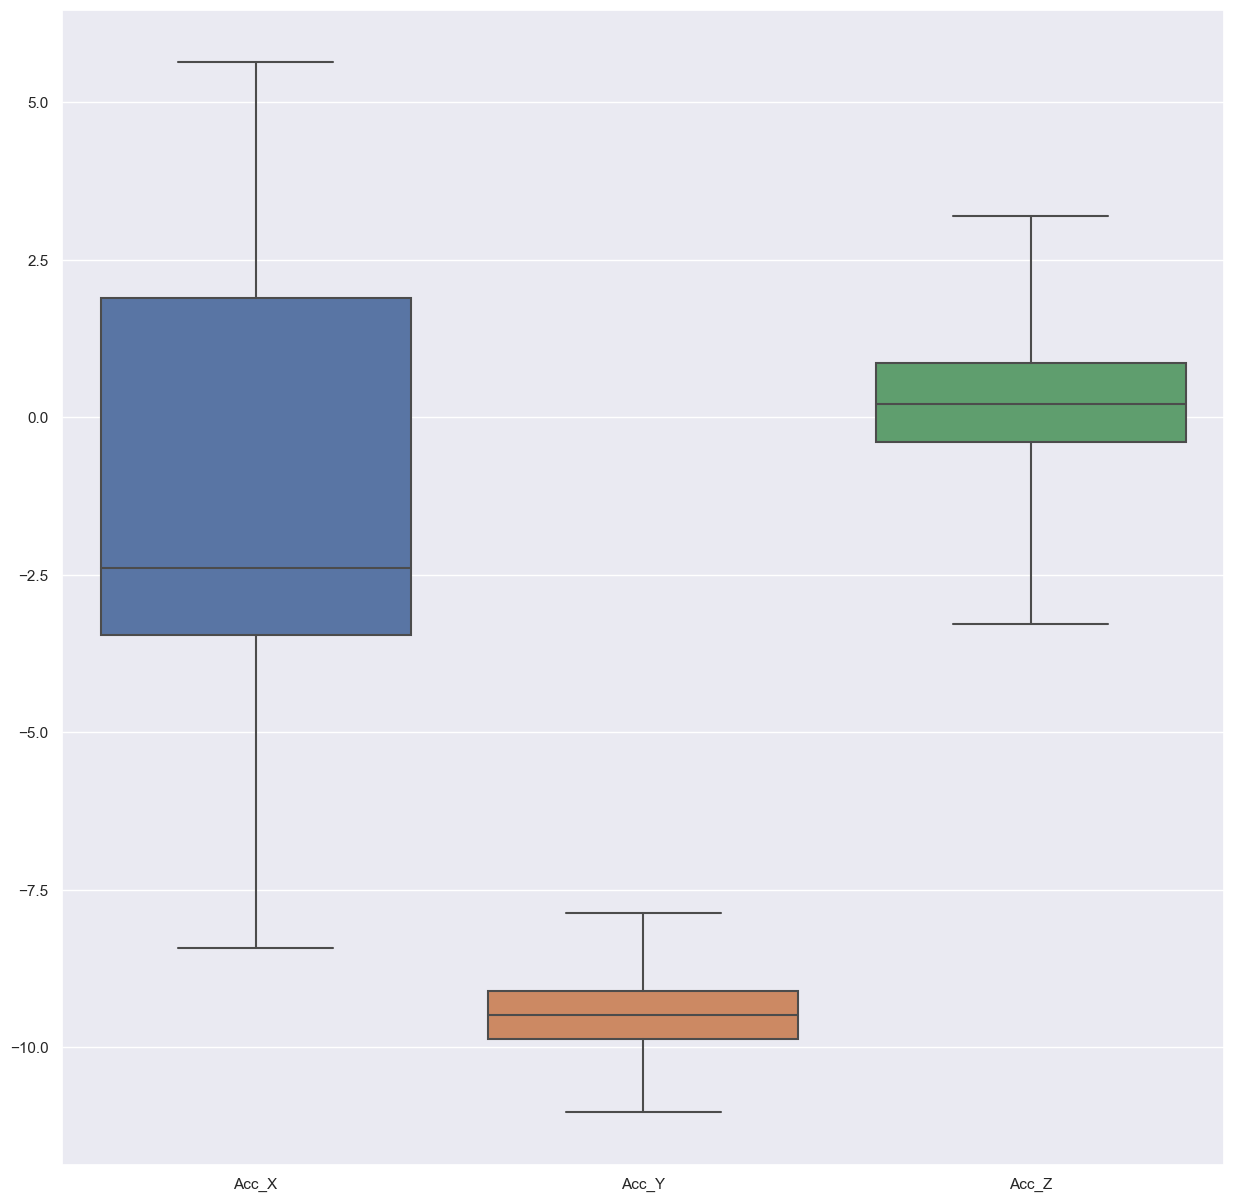

In [4]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=data.iloc[0:8000,1:4],whis=[0, 100])
count=0

In [5]:
dfn = data.drop('Unnamed: 0', axis=1)  
dfn

,Acc_X,Acc_Y,Acc_Z,Class,label
0,2.660984,-9.653030,0.470237,1,0
1,2.223091,-9.432167,2.223091,1,0
2,2.098372,-9.481953,0.926070,1,0
3,2.716461,-9.739352,0.912008,1,0
4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...
155402,8.701128,4.238336,-0.194529,21,20
155403,8.680778,4.261679,-0.159214,21,20
155404,8.756194,4.168306,-0.144251,21,20
155405,8.662222,4.219781,-0.183755,21,20


In [6]:
label.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [7]:
X = dfn[['Acc_X', 'Acc_Y', 'Acc_Z']]
y = dfn['label']

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['Acc_X', 'Acc_Y', 'Acc_Z'])
scaled_X['mag'] = np.sqrt(scaled_X['Acc_X'] ** 2 + scaled_X['Acc_Y'] ** 2 + scaled_X['Acc_Z'] ** 2)
scaled_X['label'] = y.values

scaled_X.head()

,Acc_X,Acc_Y,Acc_Z,mag,label
0,0.985481,-0.807007,-0.491449,1.365267,0
1,0.865844,-0.763546,-0.059973,1.155978,0
2,0.831769,-0.773343,-0.379243,1.197382,0
3,1.000638,-0.823993,-0.382704,1.351556,0
4,0.883684,-0.751608,-0.383103,1.221712,0


In [9]:
scaled_X = scaled_X.drop(['Acc_X', 'Acc_Y', 'Acc_Z'], axis=1)

scaled_X

,mag,label
0,1.365267,0
1,1.155978,0
2,1.197382,0
3,1.351556,0
4,1.221712,0
...,...,...
155402,3.329777,20
155403,3.326341,20
155404,3.331364,20
155405,3.318731,20


In [10]:
import scipy.stats as stats


In [63]:
Fs = 20
frame_size = Fs * 20
hop_size = Fs * 1
frames = []
labels = []

for i in range(0, len(scaled_X) - frame_size, hop_size):
    x = scaled_X['mag'].values[i: i + frame_size]
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x])
    labels.append(label)

C:\Users\Acer Nitro 5\AppData\Local\Temp\ipykernel_4260\1805871090.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]


In [64]:
frames = np.asarray(frames).reshape(-1, frame_size)
labels = np.asarray(labels)

In [65]:
print("RESHAPE SHAPE: ",frames.shape)
print("LABELS: ",labels.shape)
print("LABELS: ",labels[0])
print("LABELS: ",labels[487])


RESHAPE SHAPE:  (7751, 400)
LABELS:  (7751,)
LABELS:  0
LABELS:  1


In [66]:
x=frames
y=labels

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123, stratify=y)


In [68]:
training_files=[x_train, y_train]
subject_files=[x_test, y_test]

In [69]:
class ProgressMeter(object):
    def __init__(self, num_batches, *meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def print(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'

In [70]:
import torch
from torch.utils.data import Dataset


class LoadDataset_from_numpy(Dataset):
    def __init__(self, np_data):
        super(LoadDataset_from_numpy, self).__init__()
        X_train = np_data[0]
        y_train = np_data[1]
        self.len = X_train.shape[0]
        self.x_data = torch.from_numpy(X_train).float()
        self.y_data = torch.from_numpy(y_train).long()
        self.x_data = self.x_data.view(self.x_data.size()[0], 1, self.x_data.size()[1])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


def data_generator_np(training_files, subject_files, batch_size):
    train_dataset = LoadDataset_from_numpy(training_files)
    test_dataset = LoadDataset_from_numpy(subject_files)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True,
                                               drop_last=True,
                                               num_workers=0)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False,
                                              drop_last=True,
                                              num_workers=0)

    return train_loader, test_loader

In [71]:
train_loader, test_loader = data_generator_np(training_files, subject_files, 64)


In [72]:
import torch.nn as nn
from torch.nn import functional as f

"""
2.1  Signal Segments Representation

Signal Segment Definition: class SignalSegmentDefinition(nn.Module)
Signal Segment Representation: class SignalSegmentRepresentation(nn.Module)

2.2 Relationship Learning

2.2.1 Global Node Attention: class GNA(nn.Module):

***
(1) Signal Segment Definition -> (2) Signal Segment Representation -> (3) Global Node Attention
"""


class SignalSegmentDefinition(nn.Module):
    """
   (1) Signal Segment Definition

    input size: B, 1, 1, L
    output size: B, K, 1, D
    """
    def __init__(self, kernel_size, stride):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        b = f.unfold(x, kernel_size=self.kernel_size, stride=self.stride)  # overlapping sliding window
        b = b.permute(0, 2, 1)
        b = b.unsqueeze(-2)
        return b


class SignalSegmentRepresentation(nn.Module):
    """
    (2) Signal Segment Representation

    input arg:
    segment_size: a single signal segment size
    overlapping_rate: sliding window overlapping rate
    segment_num: number of the signal segments

    input size:  B, 1, 1, L
    output size: B, K, 1, C
    """
    def __init__(self, segment_size, overlapping_rate, segment_num):
        super(SignalSegmentRepresentation, self).__init__()
        self.overlapping = int(segment_size - segment_size * overlapping_rate)
        self.segment = SignalSegmentDefinition((1, segment_size), self.overlapping)
        self.segment2vec = SignalSegment2Vec(30)
        self.gna = GNA(segment_num)

    def forward(self, x):
        signal_segments = []
        x = self.segment(x)
        x = x.squeeze()
        "share the SignalSegment2Vec Encoder"
        for idx in range(x.size()[1]):
            data = x[:, idx, :]
            data = data.unsqueeze(1)
            out = self.segment2vec(data)
            out = out.view(x.size()[0], 1, -1)
            signal_segments.append(out)
        signal_segments = torch.cat(signal_segments, dim=1)
        signal_segments = signal_segments .unsqueeze(2)
        "global node attention"
        signal_segments = self.gna(signal_segments).permute(0, 2, 1, 3)
        return signal_segments


class GNA(nn.Module):
    """
    (3) Global Node Attention

    input arg:
    channel: number of the signal segments

    input size: B, K, 1, C
    output size: B, K, 1, C
    """
    def __init__(self, channel, reduction=2):
        super(GNA, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x)
        y = self.fc(y)
        return x * y.expand_as(x)


class SignalSegment2Vec(nn.Module):
    """
    SignalSegment2Vec Encoder module in Signal Segment Representation

    input size:  B, K, 1, D
    output size: B, K, 1, C
    """
    def __init__(self, afr_reduced_cnn_size):
        super(SignalSegment2Vec, self).__init__()
        self.features = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=49, stride=6, bias=False, padding=int(49//2)),
            nn.BatchNorm1d(64),
            nn.GELU(),
            nn.MaxPool1d(kernel_size=7, stride=4, padding=int(7//2)),

            nn.Conv1d(64, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.Conv1d(128, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.MaxPool1d(kernel_size=3, stride=4, padding=int(3//2)),
        )

        self.inplanes = 128
        self.AFR = self._make_layer(ResBasicBlock, afr_reduced_cnn_size, 1)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv1d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.features(x)
        x = self.AFR(x)
        return x


"""
"Residual Squeeze-and-Excitation(SE) Block"
"""


class ResLayer(nn.Module):
    def __init__(self, channel, reduction=2):
        super(ResLayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.GELU(),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1)
        return x * y.expand_as(x)


class ResBasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, reduction=4):
        super(ResBasicBlock, self).__init__()
        self.conv1 = nn.Conv1d(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm1d(planes)
        self.relu = nn.GELU()
        self.conv2 = nn.Conv1d(planes, planes, 1)
        self.bn2 = nn.BatchNorm1d(planes)
        self.reslayer = ResLayer(planes, reduction)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.reslayer(out)
        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [73]:
"""
2.2 Relationship Learning

2.2.2 Graph-based Self Attention

graph attention: class Attention(nn.Module)
convolution-based multi-head attention: class Block(nn.Module)
"""


class Attention(nn.Module):
    """
    Graph Attention (see Eq.4)

    input arg:
    channel: number of the signal segments
    input size:  B, M, K, C
    output size: B, M, K, C
    """
    def __init__(self, channel, reduction=2):
        super().__init__()
        self.attn = nn.Sequential(
            nn.AdaptiveAvgPool2d((None, 1)),
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        B, M, K, _ = x.size()
        adj = self.pearson(x)  # adjacency matrix
        x_ = self._prepare_attentional_mechanism_input(x)
        e = self.attn(x_)
        e = e.permute(0, 2, 1, 3).contiguous()
        e = e.view(B, M, K, K)
        zero_vec_adj = -9e15 * torch.ones_like(adj)
        attention = torch.where(adj > 0, e, zero_vec_adj)
        attention = f.softmax(attention, dim=-1)
        x = torch.matmul(attention, x)
        return x, adj

    def h_matmul(self, x):
        N = x.size()[-2]
        x_repeated_in_chunks = x.repeat_interleave(N, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, N, 1)
        result = torch.mul(x_repeated_in_chunks, x_repeated_alternating)
        return result

    def pearson(self, x):
        "Pearson Correlation"
        centered_h = x - x.mean(dim=-1, keepdim=True)
        covariance = self.h_matmul(centered_h).sum(dim=-1, keepdim=True)
        bessel_corrected_covariance = torch.div(covariance, (x.shape[-1] - 1))
        std_h = x.std(dim=-1, keepdim=True)
        p = torch.div(bessel_corrected_covariance, (self.h_matmul(std_h)))
        p = p.view(x.size()[0], x.size()[1], x.size()[2], -1)
        return p

    def _prepare_attentional_mechanism_input(self, x):
        "concatenation operation (see Eq.4) with positional encoding"
        B, _, K, _ = x.size()
        x_repeated_in_chunks = x.repeat_interleave(K, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, K, 1)

        "positional encoding"
        pos = 2 * torch.ones_like(x_repeated_alternating)
        one_vec = torch.ones_like(x_repeated_alternating)
        x_repeated_in_chunks.eq(x_repeated_alternating)
        pos = torch.where(x_repeated_in_chunks.eq(x_repeated_alternating) > 0, one_vec, pos)
        x_repeated_alternating = pos * x_repeated_alternating

        all_combinations_matrix = torch.cat([x_repeated_in_chunks, x_repeated_alternating], dim=-1)
        all_combinations_matrix = all_combinations_matrix.permute(0, 2, 1, 3)
        return all_combinations_matrix


class Block(nn.Module):
    """
    Multi-Head Attention (see Fig.2)

    input arg:
    node_size: number of the signal segments
    input_size: Q in Fig. 2
    multi_heads: number of heads

    input size: B, J, K, C    J=1 when H=1
    output size: B, M'', K, C''


    """
    def __init__(self, node_size, input_size, kernel_size, stride, multi_heads):
        super().__init__()

        expand = 1

        padding = kernel_size//2
        self.mid_channels_ = (multi_heads - kernel_size + 2 * padding) // stride + 1

        self.multi_head = nn.Sequential(
            nn.Conv2d(input_size, multi_heads, 1, bias=False),
            nn.Conv2d(multi_heads, multi_heads, 1, bias=False)
        )

        self.feature_extraction = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding,
                      groups=node_size, bias=False),
            nn.BatchNorm2d(node_size),
            nn.GELU()
        )

        self.attn = Attention(node_size * node_size)

        self.feed_forward = nn.Sequential(
            nn.Conv2d(self.mid_channels_, self.mid_channels_ * 4, 1, bias=False),
            nn.BatchNorm2d(self.mid_channels_ * 4),
            nn.GELU(),
            nn.Conv2d(self.mid_channels_ * 4, multi_heads * expand, 1, bias=False),
            nn.BatchNorm2d(multi_heads)
        )

        self.shortcut = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding, bias=False),
            nn.BatchNorm2d(node_size),
            nn.AdaptiveAvgPool2d((1, None))
        )

        self.norm = nn.BatchNorm2d(multi_heads)

    def forward(self, x):
        res = x.permute(0, 2, 1, 3)                 # B, J, K, C -> B, K, J, C
        "Dense layers"
        out = self.multi_head(x)                    # B, J, K, C -> B, M, K, C, where M is the number of heads
        out, adj = self.attn(out)
        self.adj = adj                              # for visualization
        out = f.gelu(self.norm(out))
        out = out.permute(0, 2, 1, 3)               # B, M, K, C -> B, K, M, C
        "Attention Layers"
        out = self.feature_extraction(out)          # B, K, M, C -> B, K, M', C'
        out = out.permute(0, 2, 1, 3)               # B, K, M', C' -> B, M', K, C'
        out = self.feed_forward(out)                # B, M', K, C' -> B, M'', K, C''
        shortcut = self.shortcut(res)               # B, K, J, C -> B, 1, K, C''
        shortcut = shortcut.permute(0, 2, 1, 3)
        out += shortcut                             # (B, M'', K, C'') + (B, 1, K, C'') -> (B, M'', K, C'') Broadcast
        return out

In [74]:
import torch.nn.functional as F


In [75]:
class GRAPHSENSOR(nn.Module):
    """
    GRAPHSENSOR main()

    input arg:
    segment_size: a single signal segment size
    overlapping_rate: sliding window overlapping rate
    in_channels: number of the signal segments
    class_num: class number

    input size: B, 1, L
    output size: B, class_num

    """

    def __init__(self, segment_size, overlapping_rate, in_channels, class_num):
        super(GRAPHSENSOR, self).__init__()
        self.segment_size = segment_size
        self.signal_segments = SignalSegmentRepresentation(segment_size, overlapping_rate, in_channels)
        """
        The encoder is composed of a stack of H=4 identical layers
        Multi-head number: 16 -> 32 -> 64 -> 128
        """
        self.attn = nn.Sequential(
            Block(in_channels, 1,   5, 2, 16),
            Block(in_channels, 16,  5, 2, 32),
            Block(in_channels, 32,  5, 1, 64),
            Block(in_channels, 64,  5, 1, 128),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels * 128, 512, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.GELU()
        )
        self.avgpool = nn.AdaptiveAvgPool2d((None, 1))
        self.conv3 = nn.Sequential(
            nn.Conv2d(512, 1024, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.GELU()
        )
        self.conv4 = nn.Conv2d(1024, class_num, 1, bias=False)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.signal_segments(x)
        x = self.attn(x)
        x = self.avgpool(x)
        x = x.flatten(1).unsqueeze(-1).unsqueeze(-1)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.flatten(1)
        return F.log_softmax(x, dim=-1)

In [76]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [77]:
model = GRAPHSENSOR(segment_size=80, overlapping_rate=0.5, in_channels=9, class_num=21).to(device)

In [78]:
def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameter')

The model has 1,561,768 trainable parameter


In [79]:
if torch.cuda.device_count() >= 1:
        print("num GPUs: ", torch.cuda.device_count())
        model = nn.DataParallel(model).to(device)

num GPUs:  1


In [80]:
best_acc = 0
best_f1 = 0

In [81]:
import os
import argparse
import time
import random
import torch.optim as optim

In [82]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001, amsgrad=True)
criterion = nn.CrossEntropyLoss().to(device)

In [83]:
start_time = time.time()

In [84]:
def adjust_learning_rate(optimizer, epoch, args):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    if epoch == 10:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 0.001

In [85]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)

In [86]:
def accuracy_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
        correct = 0
        correct += torch.sum(pred == target).item()
        return correct * 100 / len(target)


def f1_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
    return f1_score(pred.cpu().numpy(), target.data.cpu().numpy(), average='macro')


In [87]:
def train(train_loader, model, criterion, optimizer, epoch, print_interval):
    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score', ':.4e')

    # switch to train mode
    model.train()

    end = time.time()
    for i, (data, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        losses.update(loss.item(), data.size(0))
        acc = accuracy_(output, target)
        f1 = f1_(output, target) * 100
        accuracy.update(acc, data.size(0))
        f1_score.update(f1, data.size(0))

        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % print_interval == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'accuracy {accuracy.val:.3f} ({accuracy.avg:.3f})\t'
                  'f1_score {f1_score.val:.3f} ({f1_score.avg:.3f})'.format(
                epoch, i, len(train_loader), loss=losses, accuracy=accuracy, f1_score=f1_score))


In [88]:
def validate(val_loader, model, criterion, args):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score ', ':.4e')
    progress = ProgressMeter(len(val_loader), losses, accuracy, f1_score,
                             prefix='Test: ')

    # switch to evaluate mode
    model.eval()
    with torch.no_grad():
        end = time.time()
        for i, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)

            losses.update(loss.item(), data.size(0))
            acc = accuracy_(output, target)
            f1 = f1_(output, target) * 100
            accuracy.update(acc, data.size(0))
            f1_score.update(f1, data.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            # TODO: this should also be done with the ProgressMeter
        print(' Test: accuracy {accuracy.avg:.3f} f1_score {f1_score.avg:.3f}'
              .format(accuracy=accuracy, f1_score=f1_score))

        return accuracy.avg, f1_score.avg

In [91]:
epochs=51

In [92]:
for epoch in range(epochs):
    print("\nStart of epoch NO: %d" % (epoch,))
    adjust_learning_rate(optimizer, epoch, args=1)
    train(train_loader, model, criterion,  optimizer, epoch, print_interval=5)
    acc, f1 = validate(test_loader, model, criterion,  args=1)
    
    is_best = acc > best_acc
    best_acc = max(acc, best_acc)
            
    time_interval = time.time() - start_time
    time_split = time.gmtime(time_interval)
    print("Training time: ", time_interval, "Hour: ", time_split.tm_hour, "Minute: ", time_split.tm_min, "Second: ",
              time_split.tm_sec, end='')
    print(" Test best accuracy:", best_acc, " Test best f1 score:", best_f1)  


Start of epoch NO: 0
Epoch: [0][0/96]	Loss 1.1435 (1.1435)	accuracy 59.375 (59.375)	f1_score 55.548 (55.548)
Epoch: [0][5/96]	Loss 1.2769 (1.2443)	accuracy 50.000 (53.125)	f1_score 47.418 (48.371)
Epoch: [0][10/96]	Loss 1.1407 (1.2464)	accuracy 57.812 (53.409)	f1_score 50.790 (47.174)
Epoch: [0][15/96]	Loss 1.5796 (1.2885)	accuracy 40.625 (50.391)	f1_score 39.249 (44.323)
Epoch: [0][20/96]	Loss 1.2338 (1.2909)	accuracy 56.250 (49.777)	f1_score 48.008 (43.254)
Epoch: [0][25/96]	Loss 1.1041 (1.2907)	accuracy 56.250 (49.519)	f1_score 53.700 (42.855)
Epoch: [0][30/96]	Loss 1.1848 (1.2763)	accuracy 57.812 (50.151)	f1_score 42.568 (43.585)
Epoch: [0][35/96]	Loss 1.4136 (1.2809)	accuracy 45.312 (49.957)	f1_score 36.595 (43.340)
Epoch: [0][40/96]	Loss 1.0402 (1.2697)	accuracy 60.938 (50.800)	f1_score 47.657 (43.765)
Epoch: [0][45/96]	Loss 1.1870 (1.2624)	accuracy 53.125 (51.155)	f1_score 51.230 (44.244)
Epoch: [0][50/96]	Loss 1.1980 (1.2621)	accuracy 51.562 (51.011)	f1_score 41.931 (44.151)
E

Epoch: [4][20/96]	Loss 0.7689 (0.8289)	accuracy 73.438 (67.708)	f1_score 71.544 (62.993)
Epoch: [4][25/96]	Loss 0.8938 (0.8408)	accuracy 65.625 (67.548)	f1_score 58.199 (62.836)
Epoch: [4][30/96]	Loss 0.8490 (0.8440)	accuracy 70.312 (67.440)	f1_score 59.977 (62.578)
Epoch: [4][35/96]	Loss 0.7078 (0.8470)	accuracy 79.688 (67.448)	f1_score 74.152 (62.613)
Epoch: [4][40/96]	Loss 0.6640 (0.8525)	accuracy 71.875 (67.111)	f1_score 65.599 (62.218)
Epoch: [4][45/96]	Loss 0.7899 (0.8556)	accuracy 64.062 (66.644)	f1_score 57.530 (61.709)
Epoch: [4][50/96]	Loss 0.7274 (0.8619)	accuracy 76.562 (66.330)	f1_score 72.526 (60.952)
Epoch: [4][55/96]	Loss 0.6235 (0.8582)	accuracy 78.125 (66.323)	f1_score 75.476 (61.039)
Epoch: [4][60/96]	Loss 0.7563 (0.8564)	accuracy 67.188 (66.291)	f1_score 62.877 (61.047)
Epoch: [4][65/96]	Loss 0.8990 (0.8554)	accuracy 60.938 (66.170)	f1_score 54.033 (60.963)
Epoch: [4][70/96]	Loss 0.8453 (0.8552)	accuracy 70.312 (66.263)	f1_score 70.527 (61.098)
Epoch: [4][75/96]	Los

Epoch: [8][40/96]	Loss 0.6777 (0.6869)	accuracy 68.750 (72.904)	f1_score 60.778 (68.885)
Epoch: [8][45/96]	Loss 1.0283 (0.6929)	accuracy 64.062 (72.894)	f1_score 59.781 (69.045)
Epoch: [8][50/96]	Loss 0.7435 (0.6901)	accuracy 75.000 (73.131)	f1_score 66.111 (69.385)
Epoch: [8][55/96]	Loss 0.5503 (0.6876)	accuracy 81.250 (73.214)	f1_score 77.770 (69.408)
Epoch: [8][60/96]	Loss 0.8259 (0.6956)	accuracy 67.188 (73.284)	f1_score 66.602 (69.543)
Epoch: [8][65/96]	Loss 0.7538 (0.7045)	accuracy 73.438 (72.964)	f1_score 68.430 (69.170)
Epoch: [8][70/96]	Loss 0.7767 (0.6973)	accuracy 70.312 (73.349)	f1_score 69.389 (69.698)
Epoch: [8][75/96]	Loss 0.6070 (0.6913)	accuracy 76.562 (73.602)	f1_score 66.129 (69.957)
Epoch: [8][80/96]	Loss 0.4875 (0.6840)	accuracy 82.812 (73.765)	f1_score 75.667 (70.114)
Epoch: [8][85/96]	Loss 0.5752 (0.6791)	accuracy 81.250 (73.892)	f1_score 69.223 (70.007)
Epoch: [8][90/96]	Loss 0.5102 (0.6726)	accuracy 78.125 (74.124)	f1_score 68.751 (70.207)
Epoch: [8][95/96]	Los

Epoch: [12][60/96]	Loss 0.6385 (0.6276)	accuracy 73.438 (76.025)	f1_score 71.552 (72.125)
Epoch: [12][65/96]	Loss 0.4050 (0.6215)	accuracy 82.812 (76.207)	f1_score 75.903 (72.235)
Epoch: [12][70/96]	Loss 0.6824 (0.6236)	accuracy 76.562 (76.254)	f1_score 69.240 (72.043)
Epoch: [12][75/96]	Loss 0.5030 (0.6260)	accuracy 79.688 (76.090)	f1_score 81.213 (71.979)
Epoch: [12][80/96]	Loss 0.6306 (0.6224)	accuracy 71.875 (76.215)	f1_score 70.759 (72.262)
Epoch: [12][85/96]	Loss 0.5382 (0.6221)	accuracy 82.812 (76.235)	f1_score 82.121 (72.332)
Epoch: [12][90/96]	Loss 1.0230 (0.6251)	accuracy 59.375 (76.030)	f1_score 52.376 (72.131)
Epoch: [12][95/96]	Loss 0.5776 (0.6274)	accuracy 82.812 (76.074)	f1_score 77.970 (72.210)
 Test: accuracy 46.810 f1_score 39.360
Training time:  380.62104415893555 Hour:  0 Minute:  6 Second:  20 Test best accuracy: 69.59635416666667  Test best f1 score: 0

Start of epoch NO: 13
Epoch: [13][0/96]	Loss 0.4812 (0.4812)	accuracy 84.375 (84.375)	f1_score 80.218 (80.218)
E

Epoch: [16][75/96]	Loss 0.6782 (0.4961)	accuracy 70.312 (80.572)	f1_score 70.848 (76.437)
Epoch: [16][80/96]	Loss 0.4713 (0.4939)	accuracy 78.125 (80.671)	f1_score 74.482 (76.449)
Epoch: [16][85/96]	Loss 0.7630 (0.4909)	accuracy 68.750 (80.759)	f1_score 64.556 (76.541)
Epoch: [16][90/96]	Loss 0.8193 (0.4918)	accuracy 70.312 (80.649)	f1_score 67.587 (76.469)
Epoch: [16][95/96]	Loss 0.4194 (0.4914)	accuracy 84.375 (80.680)	f1_score 83.246 (76.633)
 Test: accuracy 75.456 f1_score 72.009
Training time:  444.00796031951904 Hour:  0 Minute:  7 Second:  24 Test best accuracy: 75.45572916666667  Test best f1 score: 0

Start of epoch NO: 17
Epoch: [17][0/96]	Loss 0.3715 (0.3715)	accuracy 85.938 (85.938)	f1_score 78.222 (78.222)
Epoch: [17][5/96]	Loss 0.6784 (0.6684)	accuracy 79.688 (76.042)	f1_score 61.929 (68.380)
Epoch: [17][10/96]	Loss 0.4120 (0.5873)	accuracy 85.938 (77.841)	f1_score 83.293 (71.531)
Epoch: [17][15/96]	Loss 0.4819 (0.5517)	accuracy 84.375 (79.004)	f1_score 76.814 (72.482)
Ep

Epoch: [20][90/96]	Loss 0.3701 (0.4214)	accuracy 84.375 (83.585)	f1_score 86.449 (80.453)
Epoch: [20][95/96]	Loss 0.2907 (0.4199)	accuracy 90.625 (83.822)	f1_score 92.666 (80.673)
 Test: accuracy 71.224 f1_score 66.089
Training time:  507.63719296455383 Hour:  0 Minute:  8 Second:  27 Test best accuracy: 79.03645833333333  Test best f1 score: 0

Start of epoch NO: 21
Epoch: [21][0/96]	Loss 0.2513 (0.2513)	accuracy 92.188 (92.188)	f1_score 93.246 (93.246)
Epoch: [21][5/96]	Loss 0.3628 (0.3566)	accuracy 84.375 (86.198)	f1_score 84.082 (85.787)
Epoch: [21][10/96]	Loss 0.1783 (0.3557)	accuracy 92.188 (85.795)	f1_score 91.427 (84.942)
Epoch: [21][15/96]	Loss 0.5295 (0.3618)	accuracy 85.938 (86.328)	f1_score 79.562 (85.037)
Epoch: [21][20/96]	Loss 0.3488 (0.3741)	accuracy 85.938 (85.714)	f1_score 82.175 (83.784)
Epoch: [21][25/96]	Loss 0.5742 (0.3853)	accuracy 76.562 (84.916)	f1_score 69.291 (82.503)
Epoch: [21][30/96]	Loss 0.4544 (0.4051)	accuracy 82.812 (84.375)	f1_score 83.787 (82.170)
Ep

Epoch: [25][5/96]	Loss 0.3337 (0.3776)	accuracy 87.500 (86.458)	f1_score 85.105 (82.972)
Epoch: [25][10/96]	Loss 0.2989 (0.3859)	accuracy 84.375 (85.085)	f1_score 79.554 (81.960)
Epoch: [25][15/96]	Loss 0.2953 (0.3963)	accuracy 87.500 (84.570)	f1_score 82.970 (81.846)
Epoch: [25][20/96]	Loss 0.5978 (0.3972)	accuracy 73.438 (84.598)	f1_score 70.879 (81.047)
Epoch: [25][25/96]	Loss 0.3316 (0.4047)	accuracy 93.750 (84.555)	f1_score 94.442 (80.998)
Epoch: [25][30/96]	Loss 0.3439 (0.3990)	accuracy 89.062 (84.728)	f1_score 88.870 (81.380)
Epoch: [25][35/96]	Loss 0.3268 (0.3912)	accuracy 84.375 (84.852)	f1_score 84.800 (81.784)
Epoch: [25][40/96]	Loss 0.3237 (0.3961)	accuracy 84.375 (84.642)	f1_score 80.974 (81.217)
Epoch: [25][45/96]	Loss 0.7483 (0.4016)	accuracy 75.000 (84.579)	f1_score 75.970 (81.207)
Epoch: [25][50/96]	Loss 0.3562 (0.3976)	accuracy 87.500 (84.896)	f1_score 84.431 (81.613)
Epoch: [25][55/96]	Loss 0.6611 (0.3991)	accuracy 68.750 (84.682)	f1_score 65.582 (81.489)
Epoch: [25]

Epoch: [29][25/96]	Loss 0.1737 (0.3438)	accuracy 95.312 (86.659)	f1_score 93.764 (84.129)
Epoch: [29][30/96]	Loss 0.3602 (0.3437)	accuracy 84.375 (86.542)	f1_score 85.125 (84.084)
Epoch: [29][35/96]	Loss 0.3608 (0.3414)	accuracy 82.812 (86.589)	f1_score 72.442 (83.699)
Epoch: [29][40/96]	Loss 0.3157 (0.3367)	accuracy 85.938 (86.738)	f1_score 79.123 (83.967)
Epoch: [29][45/96]	Loss 0.2934 (0.3391)	accuracy 81.250 (86.447)	f1_score 74.231 (83.450)
Epoch: [29][50/96]	Loss 0.3096 (0.3431)	accuracy 90.625 (86.336)	f1_score 88.131 (83.339)
Epoch: [29][55/96]	Loss 0.3618 (0.3567)	accuracy 87.500 (85.938)	f1_score 81.176 (82.887)
Epoch: [29][60/96]	Loss 0.3374 (0.3636)	accuracy 89.062 (85.784)	f1_score 85.254 (82.736)
Epoch: [29][65/96]	Loss 0.3018 (0.3717)	accuracy 87.500 (85.488)	f1_score 86.024 (82.322)
Epoch: [29][70/96]	Loss 0.4638 (0.3771)	accuracy 81.250 (85.519)	f1_score 79.238 (82.199)
Epoch: [29][75/96]	Loss 0.2808 (0.3779)	accuracy 90.625 (85.362)	f1_score 89.981 (82.228)
Epoch: [29

Epoch: [33][40/96]	Loss 0.3240 (0.3096)	accuracy 92.188 (88.872)	f1_score 91.194 (85.652)
Epoch: [33][45/96]	Loss 0.2757 (0.3123)	accuracy 90.625 (88.757)	f1_score 86.425 (85.720)
Epoch: [33][50/96]	Loss 0.3082 (0.3218)	accuracy 89.062 (88.266)	f1_score 87.737 (85.305)
Epoch: [33][55/96]	Loss 0.2678 (0.3254)	accuracy 87.500 (88.002)	f1_score 86.485 (84.906)
Epoch: [33][60/96]	Loss 0.3558 (0.3279)	accuracy 84.375 (87.679)	f1_score 76.527 (84.423)
Epoch: [33][65/96]	Loss 0.2339 (0.3305)	accuracy 92.188 (87.547)	f1_score 84.817 (84.198)
Epoch: [33][70/96]	Loss 0.2073 (0.3261)	accuracy 92.188 (87.786)	f1_score 91.576 (84.465)
Epoch: [33][75/96]	Loss 0.4886 (0.3303)	accuracy 78.125 (87.582)	f1_score 75.569 (84.312)
Epoch: [33][80/96]	Loss 0.2024 (0.3297)	accuracy 93.750 (87.596)	f1_score 93.202 (84.432)
Epoch: [33][85/96]	Loss 0.2528 (0.3267)	accuracy 90.625 (87.718)	f1_score 84.603 (84.677)
Epoch: [33][90/96]	Loss 0.7235 (0.3305)	accuracy 76.562 (87.586)	f1_score 68.297 (84.584)
Epoch: [33

Epoch: [37][55/96]	Loss 0.5668 (0.2844)	accuracy 81.250 (89.035)	f1_score 73.957 (86.755)
Epoch: [37][60/96]	Loss 0.3117 (0.2922)	accuracy 85.938 (88.550)	f1_score 86.333 (86.388)
Epoch: [37][65/96]	Loss 0.4949 (0.2935)	accuracy 79.688 (88.423)	f1_score 76.425 (86.216)
Epoch: [37][70/96]	Loss 0.1913 (0.2917)	accuracy 93.750 (88.512)	f1_score 89.429 (86.238)
Epoch: [37][75/96]	Loss 0.3820 (0.2970)	accuracy 85.938 (88.425)	f1_score 84.082 (86.138)
Epoch: [37][80/96]	Loss 0.1956 (0.2972)	accuracy 93.750 (88.426)	f1_score 90.361 (86.119)
Epoch: [37][85/96]	Loss 0.4817 (0.2971)	accuracy 90.625 (88.663)	f1_score 86.404 (86.335)
Epoch: [37][90/96]	Loss 0.3118 (0.2958)	accuracy 87.500 (88.736)	f1_score 85.391 (86.368)
Epoch: [37][95/96]	Loss 0.1187 (0.2943)	accuracy 96.875 (88.786)	f1_score 96.429 (86.390)
 Test: accuracy 75.846 f1_score 70.995
Training time:  779.2340106964111 Hour:  0 Minute:  12 Second:  59 Test best accuracy: 86.26302083333333  Test best f1 score: 0

Start of epoch NO: 38


Epoch: [41][70/96]	Loss 0.2568 (0.2416)	accuracy 89.062 (90.559)	f1_score 75.403 (87.741)
Epoch: [41][75/96]	Loss 0.3191 (0.2431)	accuracy 87.500 (90.563)	f1_score 92.708 (87.889)
Epoch: [41][80/96]	Loss 0.2812 (0.2449)	accuracy 92.188 (90.529)	f1_score 92.037 (87.868)
Epoch: [41][85/96]	Loss 0.1827 (0.2489)	accuracy 95.312 (90.425)	f1_score 94.962 (87.719)
Epoch: [41][90/96]	Loss 0.3522 (0.2506)	accuracy 89.062 (90.367)	f1_score 88.207 (87.715)
Epoch: [41][95/96]	Loss 0.2626 (0.2513)	accuracy 90.625 (90.202)	f1_score 89.460 (87.410)
 Test: accuracy 72.005 f1_score 67.348
Training time:  843.0526118278503 Hour:  0 Minute:  14 Second:  3 Test best accuracy: 86.71875  Test best f1 score: 0

Start of epoch NO: 42
Epoch: [42][0/96]	Loss 0.1925 (0.1925)	accuracy 93.750 (93.750)	f1_score 92.637 (92.637)
Epoch: [42][5/96]	Loss 0.3230 (0.2443)	accuracy 89.062 (90.365)	f1_score 86.395 (90.263)
Epoch: [42][10/96]	Loss 0.2123 (0.2570)	accuracy 90.625 (90.057)	f1_score 90.936 (89.429)
Epoch: [42][

Epoch: [45][90/96]	Loss 0.2562 (0.2489)	accuracy 90.625 (90.573)	f1_score 87.544 (88.430)
Epoch: [45][95/96]	Loss 0.3281 (0.2522)	accuracy 81.250 (90.381)	f1_score 81.463 (88.260)
 Test: accuracy 72.786 f1_score 69.064
Training time:  906.9041442871094 Hour:  0 Minute:  15 Second:  6 Test best accuracy: 86.71875  Test best f1 score: 0

Start of epoch NO: 46
Epoch: [46][0/96]	Loss 0.2926 (0.2926)	accuracy 85.938 (85.938)	f1_score 84.210 (84.210)
Epoch: [46][5/96]	Loss 0.1261 (0.2424)	accuracy 98.438 (90.885)	f1_score 98.095 (89.070)
Epoch: [46][10/96]	Loss 0.1515 (0.2311)	accuracy 93.750 (91.193)	f1_score 91.316 (89.009)
Epoch: [46][15/96]	Loss 0.2187 (0.2179)	accuracy 92.188 (91.504)	f1_score 86.777 (89.249)
Epoch: [46][20/96]	Loss 0.1753 (0.2211)	accuracy 89.062 (91.443)	f1_score 87.732 (88.739)
Epoch: [46][25/96]	Loss 0.1570 (0.2220)	accuracy 93.750 (91.406)	f1_score 93.313 (88.867)
Epoch: [46][30/96]	Loss 0.3417 (0.2250)	accuracy 84.375 (91.230)	f1_score 82.668 (89.025)
Epoch: [46][

Epoch: [50][5/96]	Loss 0.8666 (0.3984)	accuracy 73.438 (86.458)	f1_score 69.384 (83.622)
Epoch: [50][10/96]	Loss 0.3000 (0.3445)	accuracy 89.062 (87.358)	f1_score 88.976 (83.684)
Epoch: [50][15/96]	Loss 0.3953 (0.3311)	accuracy 84.375 (87.598)	f1_score 81.311 (84.532)
Epoch: [50][20/96]	Loss 0.5405 (0.3378)	accuracy 81.250 (87.649)	f1_score 82.459 (84.929)
Epoch: [50][25/96]	Loss 0.2629 (0.3426)	accuracy 90.625 (87.800)	f1_score 89.405 (85.042)
Epoch: [50][30/96]	Loss 0.2696 (0.3395)	accuracy 92.188 (87.702)	f1_score 90.862 (85.027)
Epoch: [50][35/96]	Loss 0.3043 (0.3303)	accuracy 87.500 (87.804)	f1_score 85.266 (85.091)
Epoch: [50][40/96]	Loss 0.3031 (0.3256)	accuracy 87.500 (87.691)	f1_score 82.154 (84.689)
Epoch: [50][45/96]	Loss 0.5689 (0.3256)	accuracy 76.562 (87.704)	f1_score 75.284 (84.747)
Epoch: [50][50/96]	Loss 0.2403 (0.3258)	accuracy 87.500 (87.561)	f1_score 83.869 (84.719)
Epoch: [50][55/96]	Loss 0.6363 (0.3278)	accuracy 76.562 (87.472)	f1_score 74.548 (84.651)
Epoch: [50]